# Exploratory Data Analysis on Pokemon Data

## Introduction 

On this project I will be analyzing the data on Pokemon stats up to Generation 6 of the game. 

The purpose of this project is learn how each pokemon's stats would be like at certain levels in the game and how it compares to other pokemon.

Firstly, I will check the overview of the data and see how the data looks like, which columns does it have, and what data types come with the data. 

Next I will pre-proccess the data to see if there are anything wrong with it(eg. Duplicates, Missing Values, etc.).

The next step will be to perform the analysis and compare the stats of each pokemon to each other at certain levels, and how the stats would look like with a specific Nature. Finally I will create plots to see the difference in the growth of each pokemon based on their base stats, nature, and IVs and EVs.

Questions that I will be looking to analyze are:

1. What will the stats of the starters from each Generation look like at level 10 - 50 -100? Which of the starters have the highest total amount of stats on each Generation?
3. Is it true that Dragon types have the highest attack stat compared to other typing?
4. Plot a graph to show the difference of the stats between Fire, Grass, and Water types.
5. Find which type that has the highest average on each stat(highest on attack, defense, etc.)
6. Plot a Scatterplot to show the correlations between stats for the basic types.

 

In [47]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [48]:
# Pulling the dataset and assigning it to a variable
data = pd.read_csv('pokemon.csv')

In [49]:
# Copying and assigning color codes for each type

colors = {
    "Bug": "#A6B91A",
    "Dark": "#705746",
    "Dragon": "#6F35FC",
    "Electric": "#F7D02C",
    "Fairy": "#D685AD",
    "Fighting": "#C22E28",
    "Fire": "#EE8130",
    "Flying": "#A98FF3",
    "Ghost": "#735797",
    "Grass": "#7AC74C",
    "Ground": "#E2BF65",
    "Ice": "#96D9D6",
    "Normal": "#A8A77A",
    "Poison": "#A33EA1",
    "Psychic": "#F95587",
    "Rock": "#B6A136",
    "Steel": "#B7B7CE",
    "Water": "#6390F0",
}

## Data Overview

In [50]:
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


It seems that the dataset has missing values on the type 2 column, but all the data types seem to be correct.

## Data Preprocessing
I will begin the pre-proccessing of the data.

In [52]:
# Checking the rws with missing values
data[data['Type 2'].isna()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


All the missing values are from single-typed pokemons, with most of them seem like early evolutions.
Since the data type is already an object(string) I am going to change the missing values to 'None'.

In [53]:
data['Type 2'] = data['Type 2'].fillna('None')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Now the missing values are taken care of.

In [54]:
# Checking for duplicates
data.duplicated().sum()

0

In [55]:
# Checking for implicit duplicates
data['#'].duplicated().sum()

79

There seems to be duplicates on the numbers entry.

In [56]:
data[data['#'].duplicated()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,None,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,711,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True


The duplicates apparently come from the same pokemon with different forms, which have their respective stats. I have decided to keep the duplicates as they are necessary, and have identifiable names to differentiate them.

## Data Analysis

In [57]:
# Pulling example of data again
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,None,314,44,48,65,50,64,43,1,False


First, I will make a list of the natures and create a function that calculates it so that it can be calculated along with the stats.

In [58]:
# Creating the list of natures and grouping them by the stats they improve

nature_list = [
    ['Hardy', 'Lonely', 'Adamant', 'Naughty', 'Brave'],
    ['Bold', 'Docile', 'Impish', 'Lax', 'Relaxed'],
    ['Modest', 'Mild', 'Bashful', 'Rash', 'Quiet'],
    ['Calm', 'Gentle', 'Careful', 'Quirky', 'Sassy'],
    ['Timid', 'Hasty', 'Jolly', 'Naive', 'Serious']
]

# list[0] increases attack, list[1] increases defense, list[2] increases special attack
# list[3] increases special defense, and list[4] increases speed


Next, I will create a function that calculates the stats of the pokemon based on their level.

In [59]:
# The function will take the input of the pokemon name , level, and the IVS and EVS 
# and show the pokemon's stats at the specified level

def stats(name, level, iv_hp=0, iv_atk=0, iv_def=0, iv_spatk=0, iv_spdef=0, iv_speed=0, 
          ev_hp=0, ev_atk=0, ev_def=0, ev_spatk=0, ev_spdef=0, ev_speed=0, nature='None'):
    
    """
    This function will make a row that shows the pokemon's stats at a given level
    """
    
    # Taking the row of the pokemon's name and base stats
    
    pokemon = data[data['Name'] == name]
    
    # Copying and inputting the formula from the website here and applying it to each specific stat
    
    hp = (((2 * pokemon['HP'] + iv_hp + (ev_hp / 4)) * level) / 100) + level + 10

    attack = (((2 *  pokemon['Attack'] + iv_atk + (ev_atk / 4)) * level) / 100) + 5

    defense = (((2 *  pokemon['Defense'] + iv_def + (ev_def / 4)) * level) / 100) + 5

    special_attack = (((2 *  pokemon['Sp. Atk'] + iv_spatk + (ev_spatk / 4)) * level) / 100) + 5

    special_defense = (((2 *  pokemon['Sp. Def'] + iv_spdef + (ev_spdef / 4)) * level) / 100) + 5

    speed = (((2 *  pokemon['Speed'] + iv_speed + (ev_speed / 4)) * level) / 100) + 5
    
    # Calculating nature into the equation (based on the nature, 2 stats will increase by 10% and the other decrease by 10%.)

    # Calculate the natures that increase attack
    if nature in nature_list[0]:
        if nature != nature_list[0][0]:
            attack = attack * 1.1
        if nature == nature_list[0][1]:
            defense = defense * 0.9
        elif nature == nature_list[0][2]:
            special_attack = special_attack * 0.9
        elif nature == nature_list[0][3]:
            special_defense = special_defense * 0.9
        elif nature == nature_list[0][4]:
            speed = speed * 0.9

    #  Nature that increases defense
    elif nature in nature_list[1]:
        if nature != nature_list[1][1]:
            defense = defense * 1.1
        if nature == nature_list[1][0]:
            attack = attack * 0.9
        elif nature == nature_list[1][2]:
            special_attack = special_attack * 0.9
        elif nature == nature_list[1][3]:
            special_defense = special_defense * 0.9
        elif nature == nature_list[1][4]:
            speed = speed * 0.9

    # Nature that increases Special Attack
    elif nature in nature_list[2]:
        if nature != nature_list[2][2]:
            special_attack = special_attack * 1.1
        if nature == nature_list[2][0]:
            attack = attack * 0.9
        elif nature == nature_list[2][1]:
            defense = defense * 0.9
        elif nature == nature_list[2][3]:
            special_defense = special_defense * 0.9
        elif nature == nature_list[2][4]:
            speed = speed * 0.9

    # Nature that increases Special Defense
    elif nature in nature_list[3]:
        if nature != nature_list[3][3]:
            special_defense = special_defense * 1.1
        if nature == nature_list[3][0]:
            attack = attack * 0.9
        elif nature == nature_list[3][1]:
            defense = defense * 0.9
        elif nature == nature_list[3][2]:
            special_attack = special_attack * 0.9
        elif nature == nature_list[3][4]:
            speed = speed * 0.9

    # Nature that increases Speed
    elif nature in nature_list[4]:
        if nature != nature_list[4][4]:
            speed = speed * 1.1
        if nature == nature_list[4][0]:
            attack = attack * 0.9
        elif nature == nature_list[4][1]:
            defense = defense * 0.9
        elif nature == nature_list[4][2]:
            special_attack = special_attack * 0.9
        elif nature == nature_list[4][3]:
            special_defense = special_defense * 0.9

    total = attack + defense + special_attack + special_defense + speed

    # Creating the dictionary for the stats
    statdict = {
        'Name' : name,
        'Level': level,
        'HP': hp,
        'Attack': attack,
        'Defense': defense,
        'Sp. Atk': special_attack,
        'Sp. Def': special_defense,
        'Speed': speed,
        'Total': total
    }
    # Making the dictionary into a dataframe and dropping all the decimals on the stats
    statframe = pd.DataFrame(statdict).astype('int', errors='ignore')
    
    return statframe
    

In [60]:
# Trying out the function with some pokemons

stats('Bulbasaur', 50, ev_atk=70, ev_hp=74)

,Name,Level,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
0,Bulbasaur,50,114,62,54,70,70,50,306


In [61]:
stats('Bulbasaur', 50, ev_atk=70, ev_hp=74, nature='Lonely')

,Name,Level,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
0,Bulbasaur,50,114,69,48,70,70,50,307


In [62]:
stats('Froakie', 10, ev_speed=252)

,Name,Level,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
724,Froakie,10,28,16,13,17,13,25,85


The function seems to work perfectly!

In [63]:
# Putting together multiple pokemons on one table

bulbasaur_10 = stats('Bulbasaur', 10)
bulbasaur_50 = stats('Bulbasaur', 50)
bulbasaur_100 = stats('Bulbasaur', 100)

bulbasaur_starter_table = bulbasaur_10.merge(bulbasaur_50, how='outer').merge(bulbasaur_100, how='outer')

bulbasaur_starter_table

,Name,Level,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
0,Bulbasaur,10,29,14,14,18,18,14,79
1,Bulbasaur,50,105,54,54,70,70,50,298
2,Bulbasaur,100,200,103,103,135,135,95,571


In [64]:
# I will make a function that uses the previous function to create a table with the stats for level 10, 50, and 100 on a
# single pokemon


def get_all(name):
    
    
    # Pulling the specified level's stats for the pokemon
    
    new_10 = stats(name, 10)
    new_50 = stats(name, 50)
    new_100 = stats(name, 100)
    
    merged = new_10.merge(new_50, how='outer').merge(new_100, how='outer')
    
    return merged
    
    

In [65]:
get_all('Charizard')

,Name,Level,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
0,Charizard,10,35,21,20,26,22,25,116
1,Charizard,50,138,89,83,114,90,105,481
2,Charizard,100,266,173,161,223,175,205,937


Now I'm ready to make the comparison of all the starters in one table

## Starters comparison per Generation

I will create tables for each generation and see how the starters stats look like.

In [66]:
# Getting the name of the starters from each generation

gen1_starters = ['Bulbasaur', 'Charmander', 'Squirtle', 'Pikachu', 'Eevee']

gen2_starters = ['Chikorita', 'Cyndaquil', 'Totodile']

gen3_starters = ['Treecko', 'Torchic', 'Mudkip']

gen4_starters = ['Turtwig', 'Chimchar', 'Piplup']

gen5_starters = ['Snivy', 'Tepig', 'Oshawott']

gen6_starters = ['Chespin', 'Fennekin', 'Froakie']

In [67]:
# Making a function that prints out all the starters' pokemon stats at 10, 50, and 100

def table_creator(generation:list):
    
    table = get_all(generation[0])
    
    for i in range(1, len(generation)):
        table = table.merge(get_all(generation[i]), how='outer')
    
    return table


Now I'm going to test the function.

In [68]:
gen1_table = table_creator(gen1_starters)
gen1_table

,Name,Level,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
0,Bulbasaur,10,29,14,14,18,18,14,79
1,Bulbasaur,50,105,54,54,70,70,50,298
2,Bulbasaur,100,200,103,103,135,135,95,571
3,Charmander,10,27,15,13,17,15,18,79
4,Charmander,50,99,57,48,65,55,70,295
5,Charmander,100,188,109,91,125,105,135,565
6,Squirtle,10,28,14,18,15,17,13,79
7,Squirtle,50,104,53,70,55,69,48,295
8,Squirtle,100,198,101,135,105,133,91,565
9,Pikachu,10,27,16,13,15,15,23,82


It works perfectly. It seems like Pikachu has the highest value total compared to the other starters. This makes sense because Pikachu is technically an evolved pokemon compared to the others.

I will pull up the rest of the starters' stats.

In [69]:
gen2_table = table_creator(gen2_starters)
gen2_table

,Name,Level,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
0,Chikorita,10,29,14,18,14,18,14,79
1,Chikorita,50,105,54,70,54,70,50,298
2,Chikorita,100,200,103,135,103,135,95,571
3,Cyndaquil,10,27,15,13,17,15,18,79
4,Cyndaquil,50,99,57,48,65,55,70,295
5,Cyndaquil,100,188,109,91,125,105,135,565
6,Totodile,10,30,18,17,13,14,13,77
7,Totodile,50,110,70,69,49,53,48,289
8,Totodile,100,210,135,133,93,101,91,553


Chikorita seems to have the highest total values compared to the other 2.

In [70]:
gen3_table = table_creator(gen3_starters)
gen3_table

,Name,Level,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
0,Treecko,10,28,14,12,18,16,19,79
1,Treecko,50,100,50,40,70,60,75,295
2,Treecko,100,190,95,75,135,115,145,565
3,Torchic,10,29,17,13,19,15,14,78
4,Torchic,50,105,65,45,75,55,50,290
5,Torchic,100,200,125,85,145,105,95,555
6,Mudkip,10,30,19,15,15,15,13,77
7,Mudkip,50,110,75,55,55,55,45,285
8,Mudkip,100,210,145,105,105,105,85,545


Treecko has the highest value stat compared to the rest.

In [71]:
gen4_table = table_creator(gen4_starters)
gen4_table

,Name,Level,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
0,Turtwig,10,31,18,17,14,16,11,77
1,Turtwig,50,115,73,69,50,60,36,288
2,Turtwig,100,220,141,133,95,115,67,551
3,Chimchar,10,28,16,13,16,13,17,78
4,Chimchar,50,104,63,49,63,49,66,290
5,Chimchar,100,198,121,93,121,93,127,555
6,Piplup,10,30,15,15,17,16,13,77
7,Piplup,50,113,56,58,66,61,45,286
8,Piplup,100,216,107,111,127,117,85,547


Chimcar has the highest one amongst all the starters in Gen 4.

In [72]:
gen5_table = table_creator(gen5_starters)
gen5_table

,Name,Level,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
0,Snivy,10,29,14,16,14,16,17,77
1,Snivy,50,105,50,60,50,60,68,288
2,Snivy,100,200,95,115,95,115,131,551
3,Tepig,10,33,17,14,14,14,14,73
4,Tepig,50,125,68,50,50,50,50,268
5,Tepig,100,240,131,95,95,95,95,511
6,Oshawott,10,31,16,14,17,14,14,75
7,Oshawott,50,115,60,50,68,50,50,278
8,Oshawott,100,220,115,95,131,95,95,531


Snivy has the higest total stat.

In [73]:
gen6_table = table_creator(gen6_starters)
gen6_table

,Name,Level,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
0,Chespin,10,31,17,18,14,14,12,76
1,Chespin,50,116,66,70,53,50,43,282
2,Chespin,100,222,127,135,101,95,81,539
3,Fennekin,10,28,14,13,17,17,17,78
4,Fennekin,50,100,50,45,67,65,65,292
5,Fennekin,100,190,95,85,129,125,125,559
6,Froakie,10,28,16,13,17,13,19,79
7,Froakie,50,101,61,45,67,49,76,298
8,Froakie,100,192,117,85,129,93,147,571


Froakie has the highest total value in Gen 6.

## Dragon's average attack stat

Now I will compare the average attack stat of Dragon types to the others to see if it indeed has the highest attack stat amongst other pokemon with different typing.

First I will make a count to see how many types are there.


In [74]:
# Printing the types and how many there are

print(data['Type 1'].nunique())
print(data['Type 1'].unique())

18
['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [75]:
# Grouping by each type and seeing the average stats of each type
avg_stats = data.groupby('Type 1').mean(numeric_only=True).drop(columns=['#', 'Legendary', 'Generation']).astype('int').reset_index()

avg_stats.sort_values(by='Attack', ascending=False)

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
2,Dragon,550,83,112,86,96,88,83
5,Fighting,416,69,96,65,53,64,66
10,Ground,437,73,95,84,56,62,63
16,Steel,487,65,92,126,67,80,55
15,Rock,453,65,92,100,63,75,55
1,Dark,445,66,88,70,74,69,76
6,Fire,458,69,84,67,88,72,74
7,Flying,485,70,78,66,94,72,102
17,Water,430,72,74,72,74,70,65
13,Poison,399,67,74,68,60,64,63


The Dragon type indeed has the highest attack of them all.

Now I will look for which type has the highest of each stat.

In [76]:
avg_stats.sort_values(by='HP', ascending=False)

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
2,Dragon,550,83,112,86,96,88,83
12,Normal,401,77,73,59,55,63,71
4,Fairy,413,74,61,65,78,84,48
10,Ground,437,73,95,84,56,62,63
17,Water,430,72,74,72,74,70,65
11,Ice,433,72,72,71,77,76,63
14,Psychic,475,70,71,67,98,86,81
7,Flying,485,70,78,66,94,72,102
5,Fighting,416,69,96,65,53,64,66
6,Fire,458,69,84,67,88,72,74


Dragon type also seems the highest average Health.

In [77]:
avg_stats.sort_values(by='Defense', ascending=False)

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
16,Steel,487,65,92,126,67,80,55
15,Rock,453,65,92,100,63,75,55
2,Dragon,550,83,112,86,96,88,83
10,Ground,437,73,95,84,56,62,63
8,Ghost,439,64,73,81,79,76,64
17,Water,430,72,74,72,74,70,65
11,Ice,433,72,72,71,77,76,63
1,Dark,445,66,88,70,74,69,76
0,Bug,378,56,70,70,53,64,61
9,Grass,421,67,73,70,77,70,61


Steel type has the highest Defense.

In [78]:
avg_stats.sort_values(by='Sp. Atk', ascending=False)

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
14,Psychic,475,70,71,67,98,86,81
2,Dragon,550,83,112,86,96,88,83
7,Flying,485,70,78,66,94,72,102
3,Electric,443,59,69,66,90,73,84
6,Fire,458,69,84,67,88,72,74
8,Ghost,439,64,73,81,79,76,64
4,Fairy,413,74,61,65,78,84,48
9,Grass,421,67,73,70,77,70,61
11,Ice,433,72,72,71,77,76,63
17,Water,430,72,74,72,74,70,65


Psychic has the highest Special Attack.

In [79]:
avg_stats.sort_values(by='Sp. Def', ascending=False)

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
2,Dragon,550,83,112,86,96,88,83
14,Psychic,475,70,71,67,98,86,81
4,Fairy,413,74,61,65,78,84,48
16,Steel,487,65,92,126,67,80,55
11,Ice,433,72,72,71,77,76,63
8,Ghost,439,64,73,81,79,76,64
15,Rock,453,65,92,100,63,75,55
3,Electric,443,59,69,66,90,73,84
6,Fire,458,69,84,67,88,72,74
7,Flying,485,70,78,66,94,72,102


Dragon has 3 stats that are the highest between other types, which is HP, Attack and Special Defense.

In [80]:
avg_stats.sort_values(by='Speed', ascending=False)

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
7,Flying,485,70,78,66,94,72,102
3,Electric,443,59,69,66,90,73,84
2,Dragon,550,83,112,86,96,88,83
14,Psychic,475,70,71,67,98,86,81
1,Dark,445,66,88,70,74,69,76
6,Fire,458,69,84,67,88,72,74
12,Normal,401,77,73,59,55,63,71
5,Fighting,416,69,96,65,53,64,66
17,Water,430,72,74,72,74,70,65
8,Ghost,439,64,73,81,79,76,64


Flying has the highest Speed stat between other types.

## Graphs

Now I am going to plot the graphs of the stats.

### Radar chart for stat comparison

This graph shows the difference between the stats of each type/pokemon

In [81]:
# Creating a function that would display the stats of the desired Type

def plot_stats(type):
    stat_type = avg_stats[avg_stats['Type 1'] == type]
    obj = go.Scatterpolar(
    
        r=[
        stat_type['HP'].values[0],
        stat_type['Attack'].values[0],
        stat_type['Defense'].values[0],
        stat_type['Sp. Atk'].values[0],
        stat_type['Sp. Def'].values[0],
        stat_type['Speed'].values[0],
        stat_type['HP'].values[0]
        ],
    
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        marker=dict(color=colors[stat_type['Type 1'].values[0]]),
        fill='toself',
        name=stat_type['Type 1'].values[0]
    )
   
    return obj
    
# Setting the layout

layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 250]
        )
    ),
    showlegend=True,
    title="Stat Graph"
)    



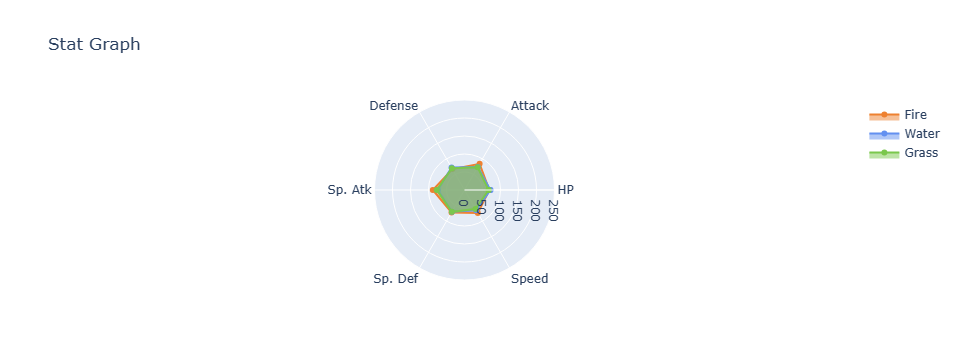

In [82]:
fire = plot_stats('Fire')
water = plot_stats('Water')
grass = plot_stats('Grass')

go.Figure(data=[fire, water, grass], layout=layout)



In [83]:
avg_stats[avg_stats['Type 1'].isin(['Fire', 'Water', 'Grass'])]

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
6,Fire,458,69,84,67,88,72,74
9,Grass,421,67,73,70,77,70,61
17,Water,430,72,74,72,74,70,65


In [84]:
# Function for individual pokemon stat graphs

def plot_pkmn_stats(name):
    pkmn_stat = data[data['Name'] == name]
    obj = go.Scatterpolar(
    
        r=[
        pkmn_stat['HP'].values[0],
        pkmn_stat['Attack'].values[0],
        pkmn_stat['Defense'].values[0],
        pkmn_stat['Sp. Atk'].values[0],
        pkmn_stat['Sp. Def'].values[0],
        pkmn_stat['Speed'].values[0],
        pkmn_stat['HP'].values[0]
        ],
    
        theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
        marker=dict(color=colors[pkmn_stat['Type 1'].values[0]]),
        fill='toself',
        name=pkmn_stat['Name'].values[0]
    )
   
    return obj

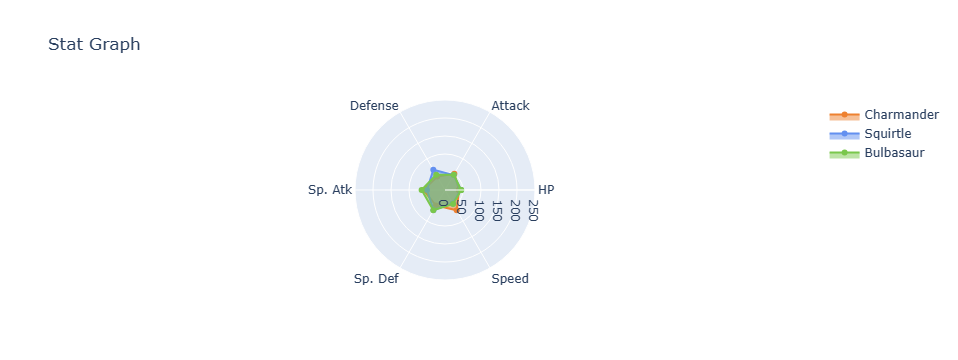

In [85]:
pkmn1= plot_pkmn_stats('Charmander')
pkmn2= plot_pkmn_stats('Squirtle')
pkmn3= plot_pkmn_stats('Bulbasaur')

gen1_stats = go.Figure(data=[pkmn1, pkmn2, pkmn3], layout=layout)
gen1_stats

Now I'm going to make the Histograms and the Scatterplot for the data.

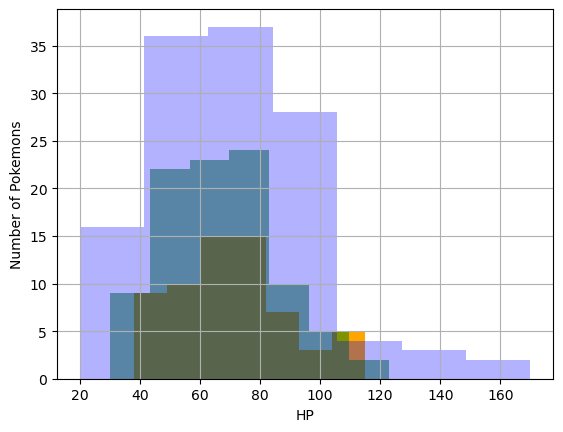

In [86]:
fire_data = data[(data['Type 1'] == 'Fire') | (data['Type 2']== 'Fire')]
grass_data = data[(data['Type 1'] == 'Grass') | (data['Type 2']== 'Grass')]
water_data = data[(data['Type 1'] == 'Water') | (data['Type 2']== 'Water')]

fire_data['HP'].hist(bins=7, color='orange')
grass_data['HP'].hist(bins=7, color='green', alpha=0.5)
water_data['HP'].hist(bins=7, color='blue', alpha=0.3)
plt.xlabel('HP')
plt.ylabel('Number of Pokemons')

plt.show()

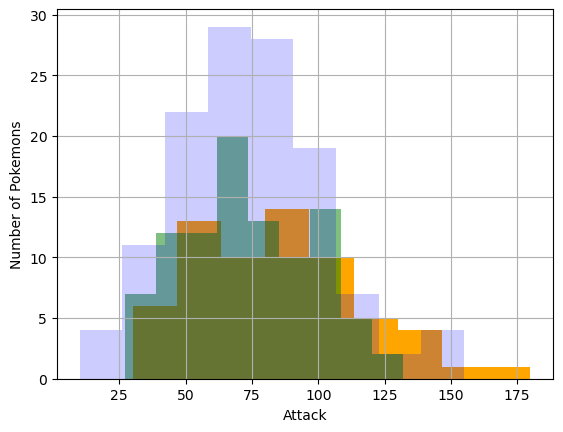

In [87]:
fire_data['Attack'].hist(bins=9, color='orange')
grass_data['Attack'].hist(bins=9, color='green', alpha=0.5)
water_data['Attack'].hist(bins=9, color='blue', alpha=0.2)

plt.xlabel('Attack')
plt.ylabel('Number of Pokemons')

plt.show()

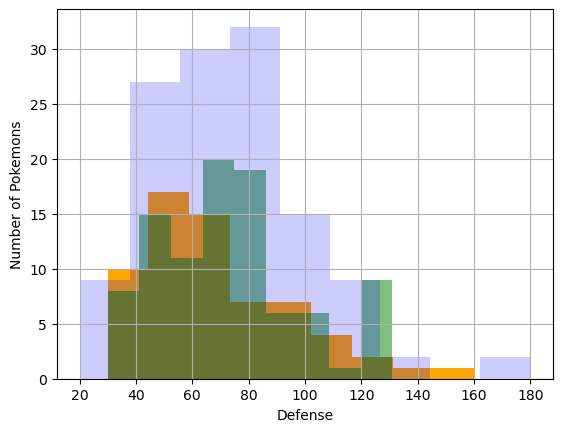

In [88]:
fire_data['Defense'].hist(bins=9, color='orange')
grass_data['Defense'].hist(bins=9, color='green', alpha=0.5)
water_data['Defense'].hist(bins=9, color='blue', alpha=0.2)

plt.xlabel('Defense')
plt.ylabel('Number of Pokemons')

plt.show()

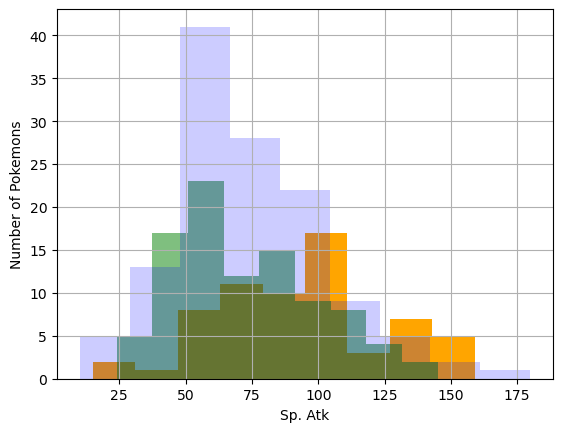

In [89]:
fire_data['Sp. Atk'].hist(bins=9, color='orange')
grass_data['Sp. Atk'].hist(bins=9, color='green', alpha=0.5)
water_data['Sp. Atk'].hist(bins=9, color='blue', alpha=0.2)

plt.xlabel('Sp. Atk')
plt.ylabel('Number of Pokemons')

plt.show()

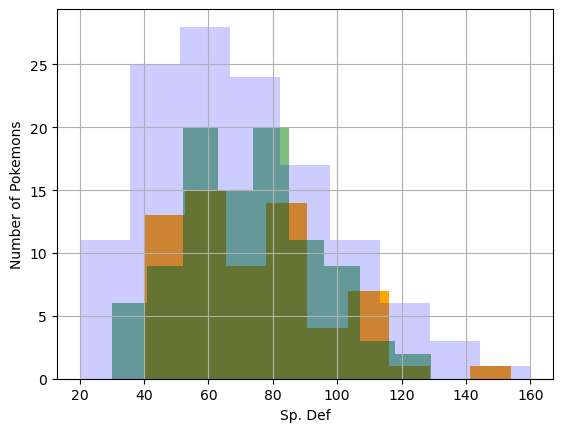

In [90]:
fire_data['Sp. Def'].hist(bins=9, color='orange')
grass_data['Sp. Def'].hist(bins=9, color='green', alpha=0.5)
water_data['Sp. Def'].hist(bins=9, color='blue', alpha=0.2)

plt.xlabel('Sp. Def')
plt.ylabel('Number of Pokemons')

plt.show()

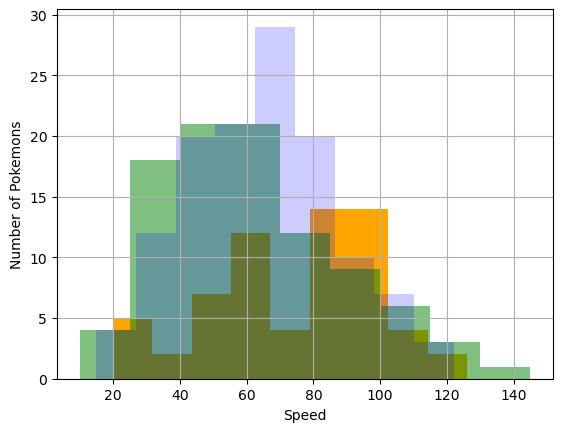

In [91]:
fire_data['Speed'].hist(bins=9, color='orange')
grass_data['Speed'].hist(bins=9, color='green', alpha=0.5)
water_data['Speed'].hist(bins=9, color='blue', alpha=0.2)

plt.xlabel('Speed')
plt.ylabel('Number of Pokemons')

plt.show()

### Scatterplots

Showing the correlation betwween the Attack and Defense of the basic types over Generations.

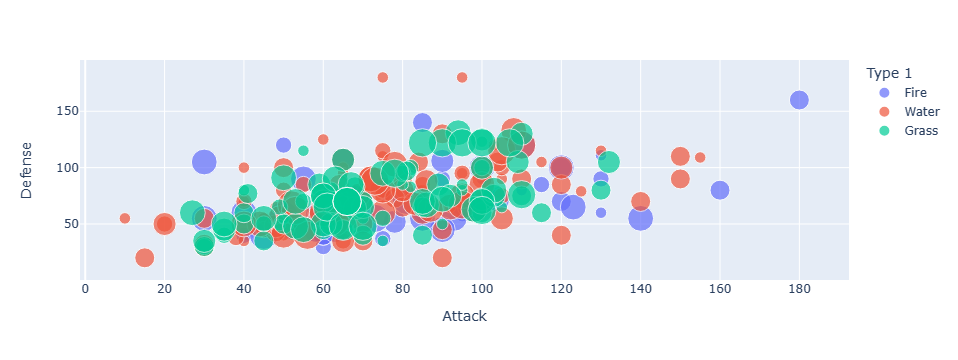

In [99]:
fire_data = fire_data.assign(**{"Type 1": "Fire"})
water_data = water_data.assign(**{"Type 1": "Water"})
grass_data = grass_data.assign(**{"Type 1": "Grass"})

basic_types = pd.concat([fire_data, water_data, grass_data])

px.scatter(
    basic_types,
    x='Attack',
    y='Defense',
    color='Type 1',
    hover_name='Name',
    size='Generation'
)

# Conclusion

From the data I've gathered, it shows that Grass-type starters have overall better stats throughout the generations, with 3 of the Generations having their Grass-type starters as the highest base stats compared to the 2 other types. Coming in 2nd is the Water type, and last is the Fire type. 

The data also shows that Dragon-type Pokemons indeed have the highest average base Attack stat compared to that of the other types. This is mostly due to most of the legendary Pokemons, which boasts higher than average stats, have Dragon as their types. For that reason, Dragon types also has the highest stats in 2 other stats, namely HP and Special Defense. As for the other stats, Steel dominates in the Defense stat, while Psychic type has the highest in Special Attack, and finally Speed is won by Flying-type Pokemons.

From the radar chart, we can't really see that much difference, but through the Histogram, we can see that between the 3 basic Types, Water-type Pokemons have the highest count. They also have the highest max values in 3 stats, namely HP, Sp. Atk, and Sp. Def. Fire types have the least amount of Pokemons, and wins in the Attack stat, while Grass types win at Speed.

From the Scatterplot we can see that the later Generations are more in the middle area on the plot, which shows the Pokemons are actually more balanced in the physical side. The pokemons on the right end are mostly mega evolutions and evolved pokemons or altered stronger versions of certain pokemons, which shows their higher attributes. 